In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
houses = pd.read_csv('Casas_venezuela.csv')
apartments = pd.read_csv('Departamentos_venezuela.csv')

In [8]:
houses.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,Precio,Área Privada,Terreno,Dormitorios,Total Baños,Baños Completos,Puestos De Estacionamiento,Medios Baños
count,360.000,360.000,360.000,360.000,360.000,360.000,306.000,360.000
mean,156816.861,1131.361,759.472,4.197,3.969,3.544,3.840,0.419
std,208535.098,6245.014,5012.374,1.536,1.914,1.657,2.559,0.696
min,160.000,41.000,2.000,1.000,1.000,0.000,0.000,0.000
25%,32000.000,176.000,172.000,3.000,3.000,2.000,2.000,0.000
50%,85000.000,300.000,330.000,4.000,4.000,3.000,3.000,0.000
75%,191250.000,450.000,568.250,5.000,5.000,4.000,5.000,1.000
max,1800000.000,95000.000,95000.000,13.000,14.000,11.000,20.000,6.000


In [9]:
apartments.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,Precio,Área Privada,Dormitorios,Total Baños,Baños Completos,Puestos De Estacionamiento,Medios Baños
count,360.000,360.000,360.000,360.000,360.000,360.000,360.000
mean,97988.417,302.967,2.644,2.539,2.292,1.711,0.242
std,153378.704,1641.523,0.957,1.290,1.027,1.314,0.478
min,120.000,35.000,1.000,1.000,0.000,0.000,0.000
25%,22000.000,78.000,2.000,2.000,2.000,1.000,0.000
50%,50000.000,102.000,3.000,2.000,2.000,2.000,0.000
75%,115000.000,143.250,3.000,3.000,3.000,2.000,0.000
max,1700000.000,27190.000,6.000,9.000,7.000,18.000,2.000


En estas tablas resumen se encuentran algunos indicadores estadísticos comunes como la media, la desviación estandard, el minimo, el primer cuartil, mediana, tercer cuartil y el máximo.

In [10]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Precio                      360 non-null    int64  
 1   Codígo RAH                  360 non-null    object 
 2   Tipo de Propiedad           360 non-null    object 
 3   Estilo                      360 non-null    object 
 4   Área Privada                360 non-null    int64  
 5   Terreno                     360 non-null    int64  
 6   Estado Del Inmueble         360 non-null    object 
 7   Dormitorios                 360 non-null    int64  
 8   Total Baños                 360 non-null    int64  
 9   Baños Completos             360 non-null    int64  
 10  Tipo De Estacionamiento     360 non-null    object 
 11  Puestos De Estacionamiento  306 non-null    float64
 12  Amoblado                    360 non-null    object 
 13  Dormitorio De Servicio      360 non

In [11]:
apartments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Precio                      360 non-null    int64  
 1   Codígo RAH                  360 non-null    object 
 2   Tipo de Propiedad           360 non-null    object 
 3   Estilo                      360 non-null    object 
 4   Área Privada                360 non-null    int64  
 5   Estado Del Inmueble         360 non-null    object 
 6   Dormitorios                 360 non-null    int64  
 7   Total Baños                 360 non-null    int64  
 8   Baños Completos             360 non-null    int64  
 9   Tipo De Estacionamiento     360 non-null    object 
 10  Puestos De Estacionamiento  360 non-null    int64  
 11  Amoblado                    360 non-null    object 
 12  Dormitorio De Servicio      360 non-null    object 
 13  País                        360 non

In [31]:
# Separo las columnas numericas
houses_numeric_features = [col for col in houses.columns if houses[col].dtype != 'object']
apartments_numeric_features = [col for col in apartments.columns if apartments[col].dtype != 'object']

In [82]:
houses_numeric_features

['Precio',
 'Área Privada',
 'Terreno',
 'Dormitorios',
 'Total Baños',
 'Baños Completos',
 'Puestos De Estacionamiento',
 'Medios Baños']

In [117]:
# Grafico para cada columna numerica un histograma y un boxplot
def graph_numeric_features(df, features):
    for col in features:
        fig, ax = plt.subplots(2, 1, figsize=(9,6), height_ratios=[2,1])
        
        # Intento transformar la columa a int, y si no se puede le quito los nan a las columnas float
        try:
            feature = df[col].astype(int)
        except pd.errors.IntCastingNaNError:
            feature = df[ df[col].notnull() ][col]
        
        # Histograma
        ax[0].hist(feature, bins=50, edgecolor = "black")
        # Distribucion
        feature.plot(kind='kde', ax=ax[0], secondary_y = True, color='green', linestyle='dashed')
        ax[0].ticklabel_format(style='plain')
        ax[0].axvline(feature.median(), color='red', linestyle='dashed', linewidth=2, label= f'Mediana = {feature.median():.3f}')
        ax[0].axvline(feature.mean(), color='orange', linestyle='dashed', linewidth=2, label= f'Media = {feature.mean():.3f}')
        ax[0].legend()
        
        # Boxplot
        ax[1].boxplot(feature, vert = False, medianprops = { 'color':'red' })
        ax[1].get_xaxis().get_major_formatter().set_scientific(False)

        fig.suptitle(col)
    plt.show()

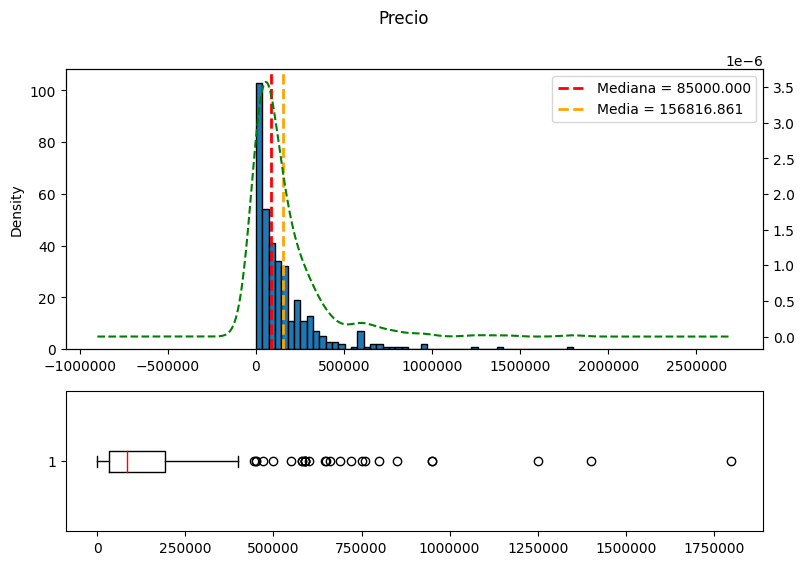

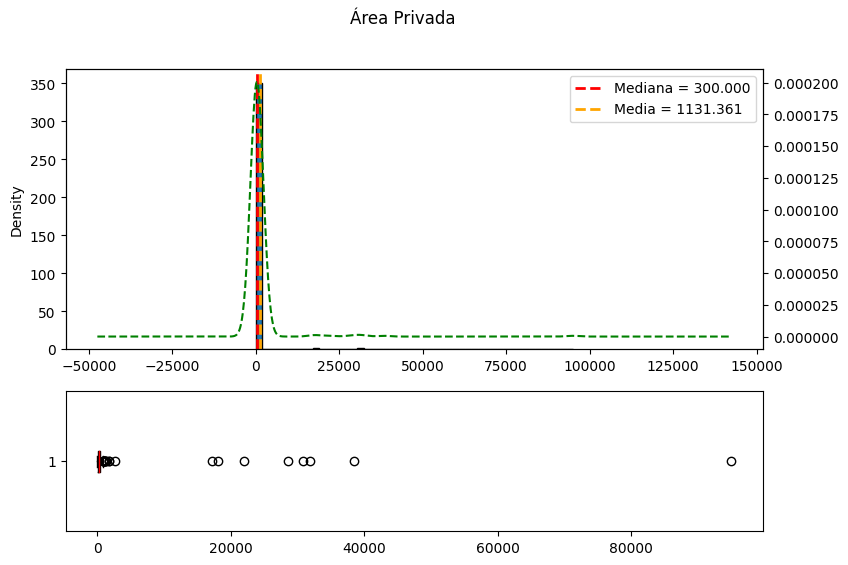

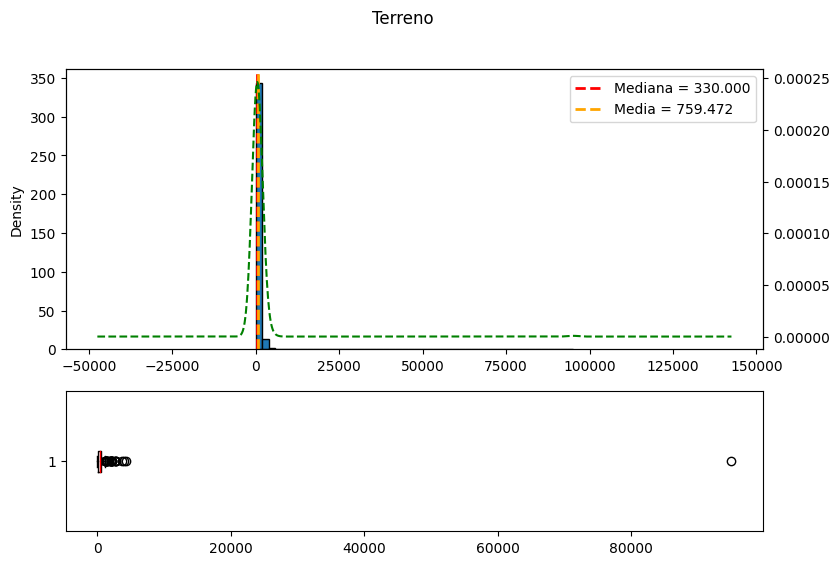

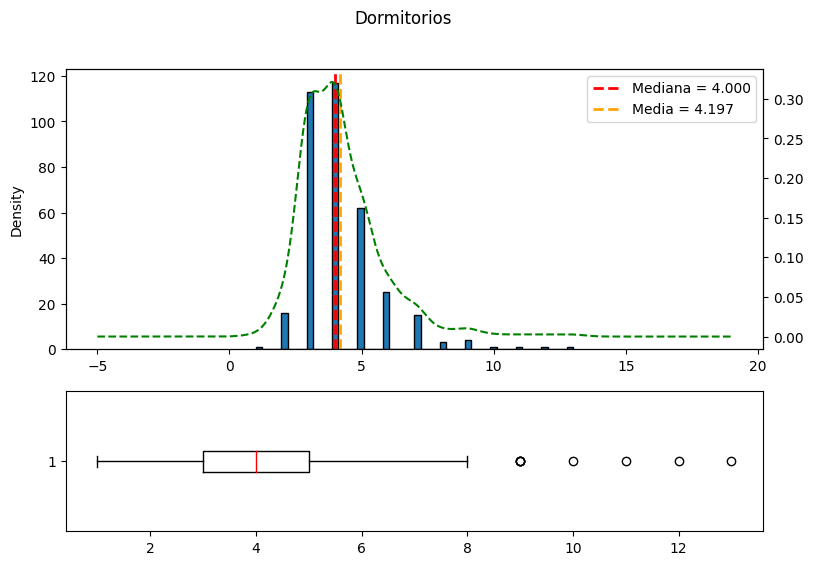

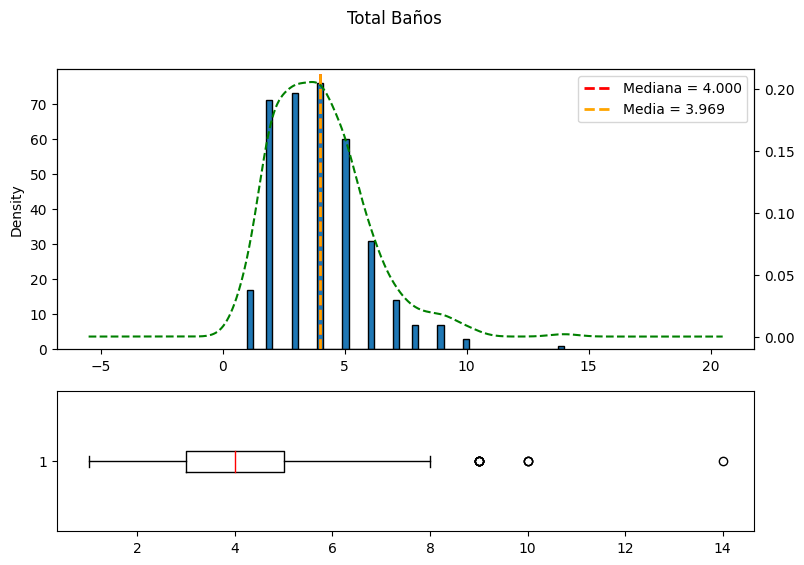

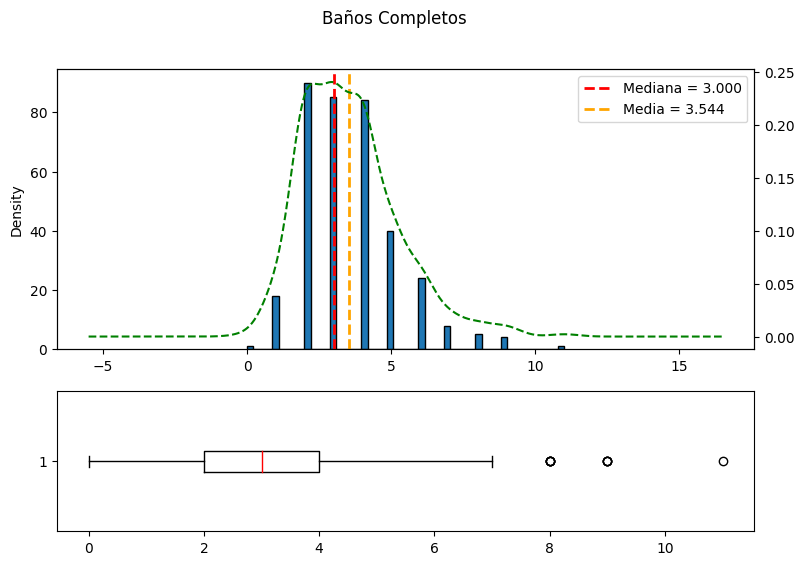

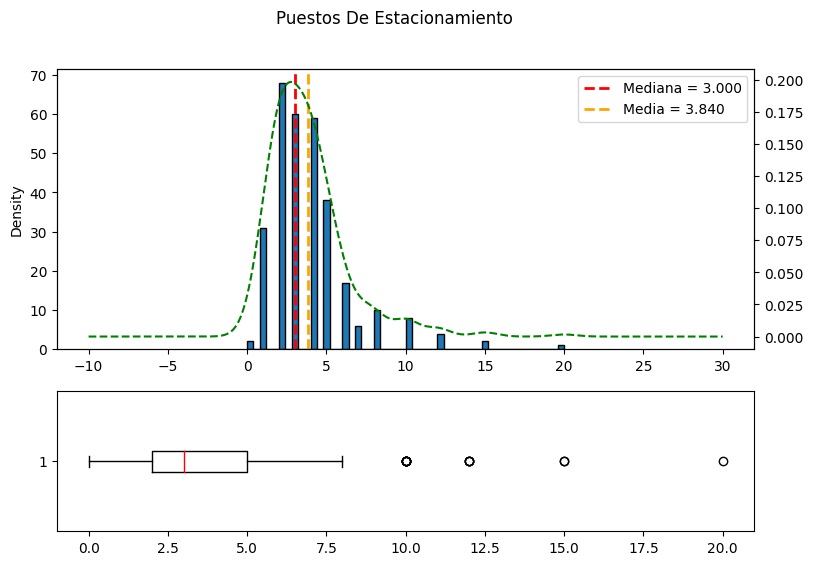

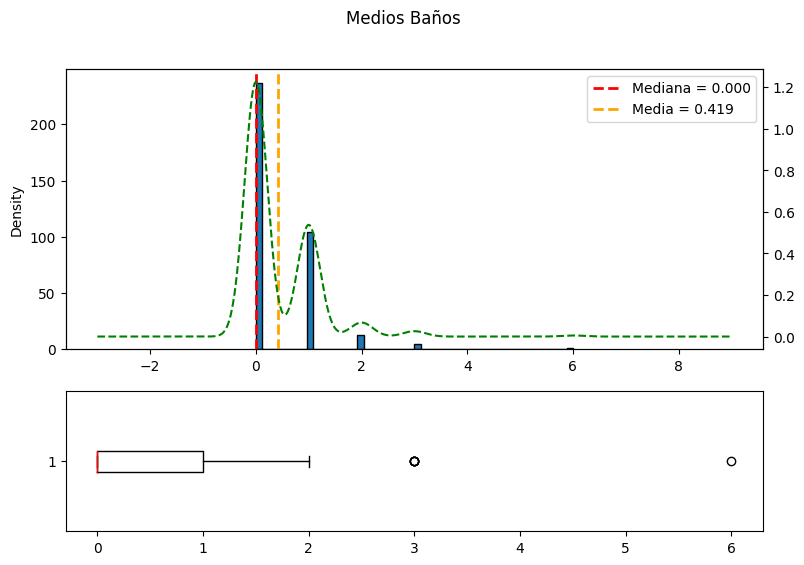

In [118]:
graph_numeric_features(houses, houses_numeric_features)

Podemos notar como los precios, dormitorios, total de baños, cantidad de baños y puestos de estacionamientos tienen una distribución asimétrica con cola a la detrica, lo cual se evidencia no solo gráficamente sino también porque la media esta a la derecha de la mediana.  
Sin embargo, el análisis de los valores de terrenos y áreas es inconcluso ya que hay outliers muy grandes, y en particular hay uno que es demasiado grando comparado a los demas, que distorsionan el gráfico.

In [120]:
houses[['Terreno', 'Área Privada']].idxmax()

Terreno         24
Área Privada    24
dtype: int64

In [122]:
houses.iloc[24]

Precio                                       550000
Codígo RAH                              VE 23-26132
Tipo de Propiedad                              Casa
Estilo                                      1 Nivel
Área Privada                                  95000
Terreno                                       95000
Estado Del Inmueble                           Usado
Dormitorios                                       9
Total Baños                                       6
Baños Completos                                   6
Tipo De Estacionamiento                 Descubierto
Puestos De Estacionamiento                     20.0
Amoblado                               Parcialmente
Dormitorio De Servicio                           Si
Calle                                   Calle Ciega
País                                      Venezuela
Estado                                       Vargas
Ciudad                           El Junquito-Vargas
Urbanización                  El Junko Country Club
Medios Baños

Este outlier con 95000 m^2 de área me distorsiona muchisimo el análisis, y no parece ser un error de tipeo, ya que en la publicación de la casa hacen énfasis en esta área tan grande.

In [156]:
# Grafico dejando a los mayores outliers, quedandome con los valores por debajo del cuantil 95% y por encima del 1%
def graph_numeric_without_outliers(df, features):
    for col in features:
        fig, ax = plt.subplots(2, 1, figsize=(9,6), height_ratios=[2,1])

        try:
            feature = df[col].astype(int)
        except pd.errors.IntCastingNaNError:
            feature = df[ df[col].notnull() ][col]
        
        feature = feature[(feature < feature.quantile(q=0.95)) & (feature > feature.quantile(q=0.01))]
        
        ax[0].hist(feature, bins=50, edgecolor = "black")
        feature.plot(kind='kde', ax=ax[0], secondary_y = True, color='green', linestyle='dashed')
        ax[0].ticklabel_format(style='plain')
        ax[0].axvline(feature.median(), color='red', linestyle='dashed', linewidth=2, label= f'Mediana = {feature.median():.3f}')
        ax[0].axvline(feature.mean(), color='orange', linestyle='dashed', linewidth=2, label= f'Media = {feature.mean():.3f}')
        ax[0].legend()
        
        ax[1].boxplot(feature, vert = False, medianprops = { 'color':'red' })
        ax[1].get_xaxis().get_major_formatter().set_scientific(False)

        fig.suptitle(col)
    plt.show()

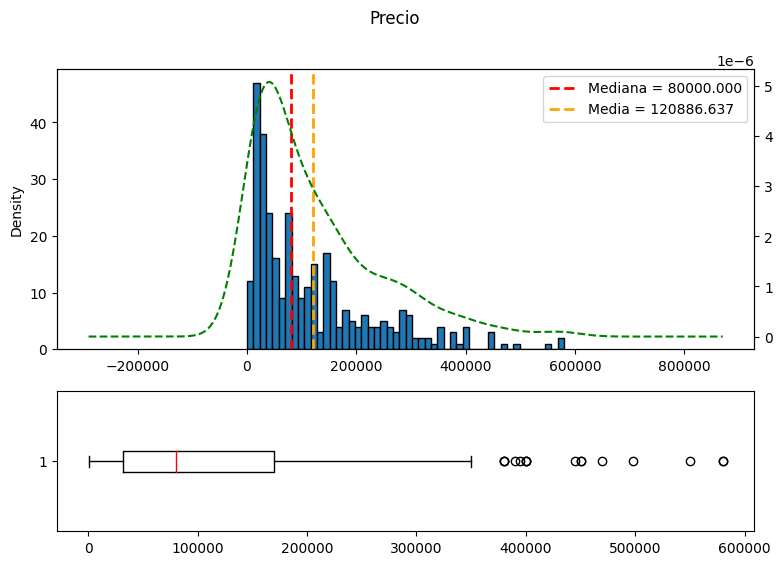

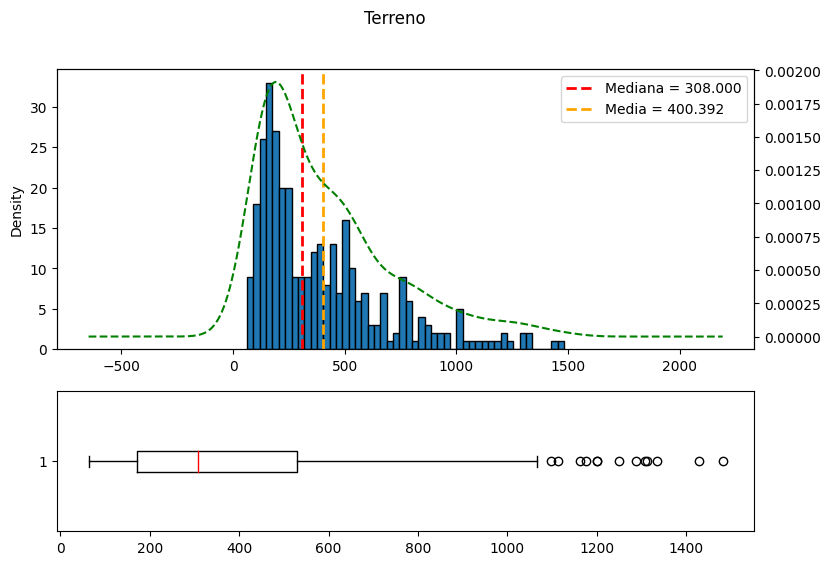

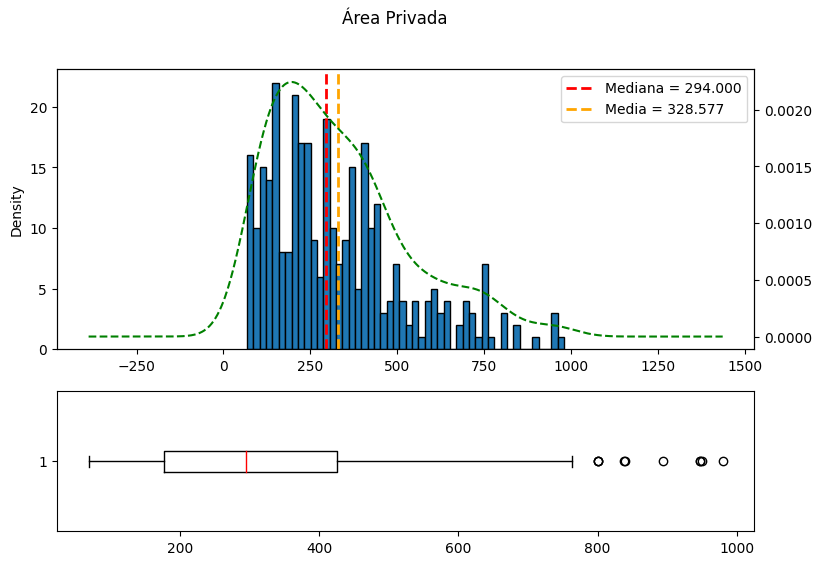

In [159]:
graph_numeric_without_outliers(houses, ['Precio','Terreno', 'Área Privada'])

Ahora si, sin tantos valores extremos podemos observar la distribución también asimétrica con cola hacia la derecha del área y terreno de las casas.
Agregué también el precio para apreciarlo mejor, pero su distribución no cambio de forma.

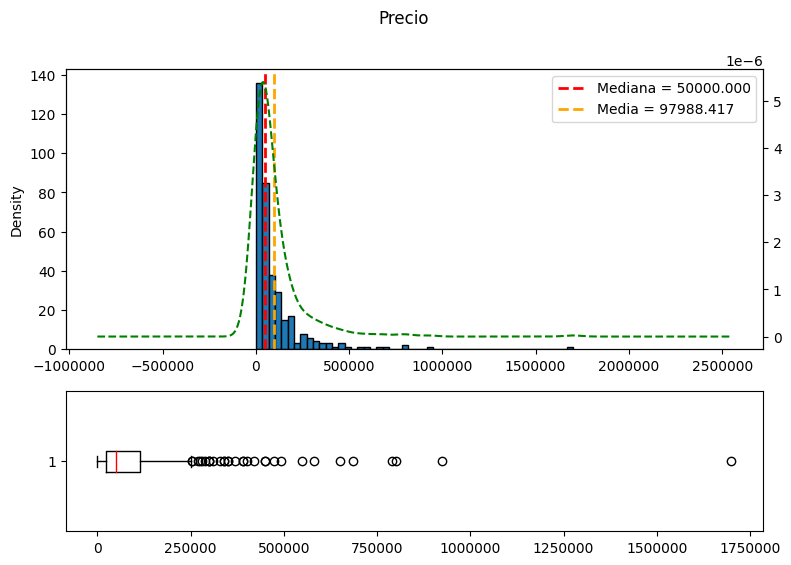

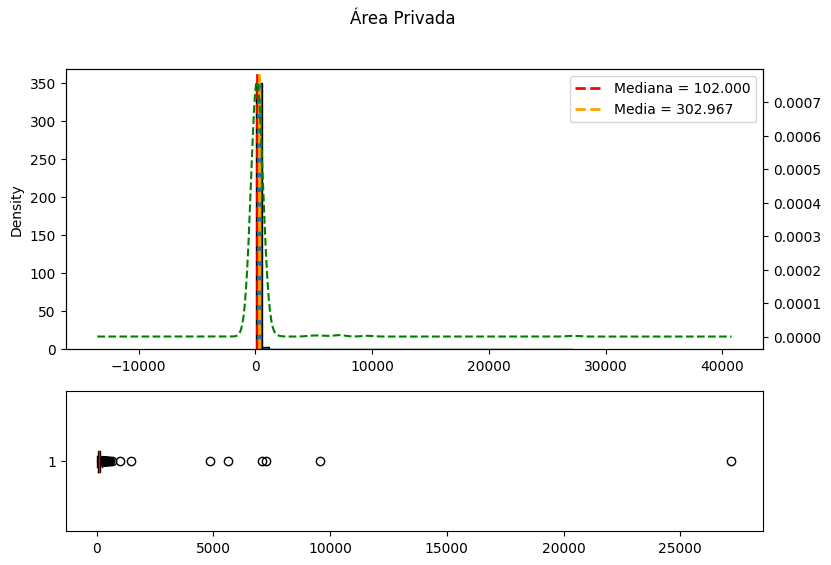

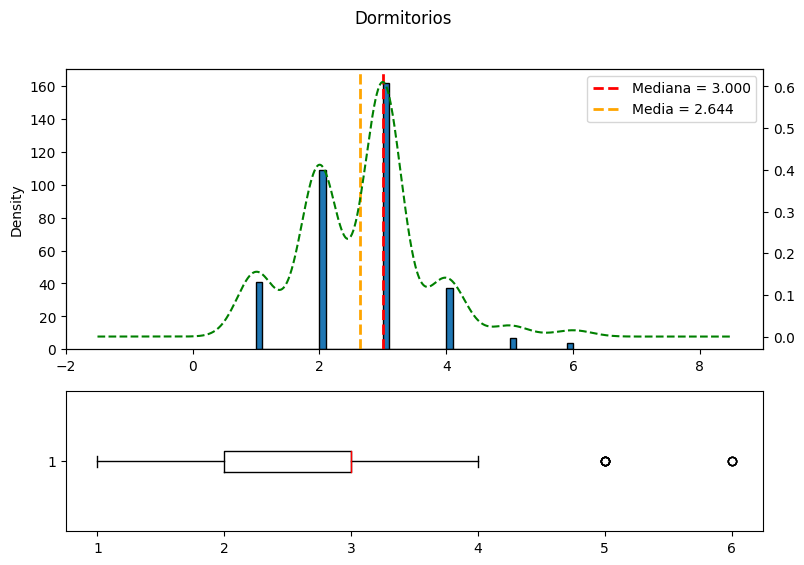

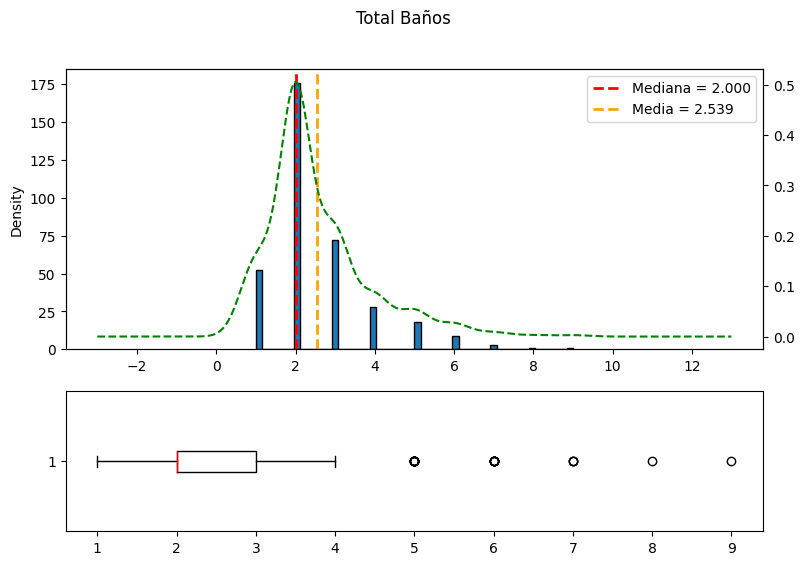

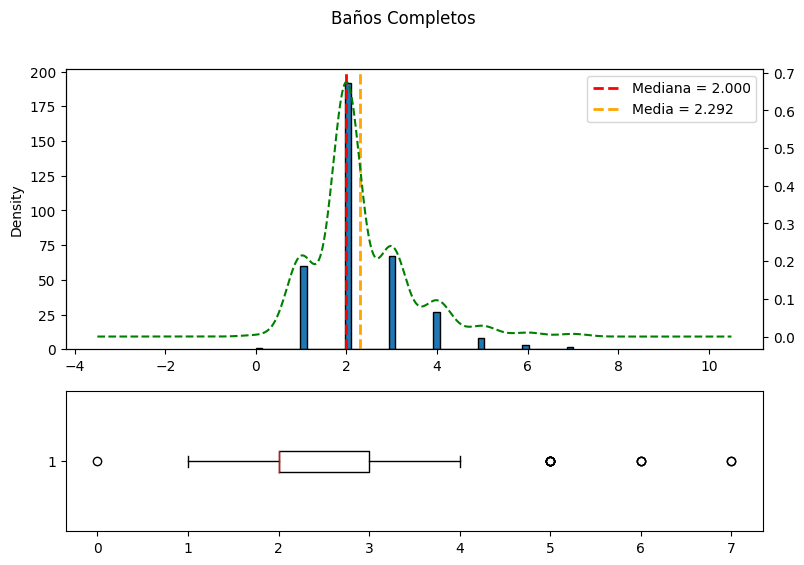

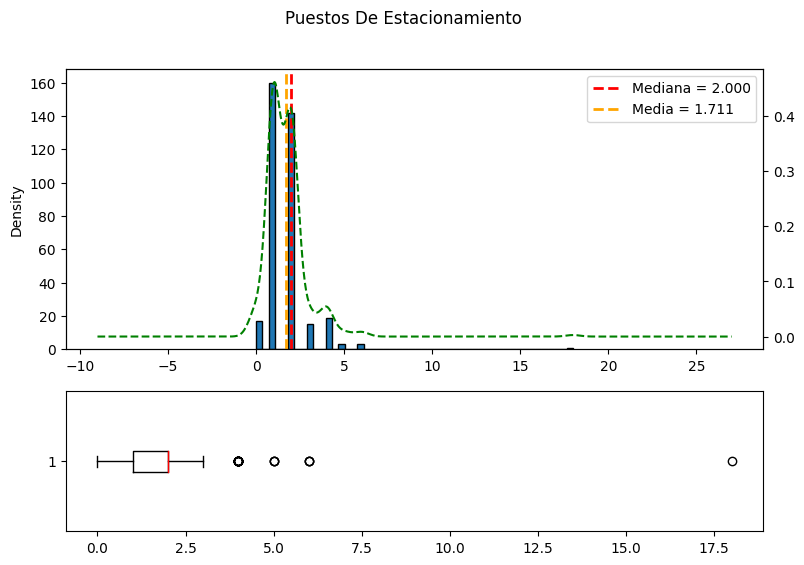

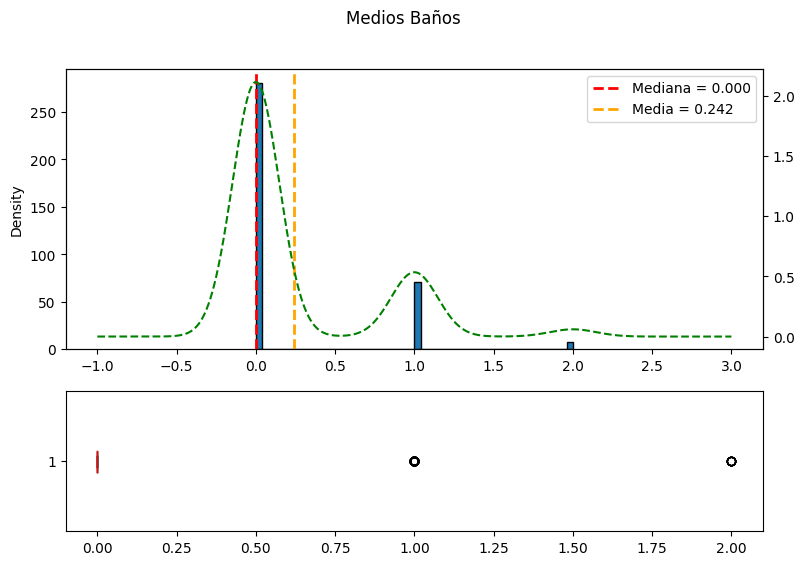

In [158]:
graph_numeric_features(apartments, apartments_numeric_features)

Para los departamentos tenemos una situación parecida con respecto a presencia de outliers que distorsionan el análisis para el terreno y área, pero en particular para departamentos parece haber una mayor asimetría en los precios a simple vista.  
También, es de interés la forma del gráfico para los medios baños, lo cual se debe a que no es común que haya medios baños en departamentos.

In [167]:
# Mayor valor positivo del skew -> mayor longitud de la cola derecha (mas asimetrico)
print("Skew para casas: ",houses['Precio'].skew())
print("Skew para departamentos: ", apartments['Precio'].skew())
# Mayor valor de kurtosis -> colas mas gruesas, centro mas "en punta" y menor proporcion de valores intermedios
print(f"Kurtosis para casas: {houses['Precio'].kurt()}")
print(f"Kurtosis para departamentos: {apartments['Precio'].kurt()}")


Skew para casas:  3.40211546425077
Skew para departamentos:  4.92455412953719
Kurtosis para casas: 16.92167357263459
Kurtosis para departamentos: 37.870970961112015


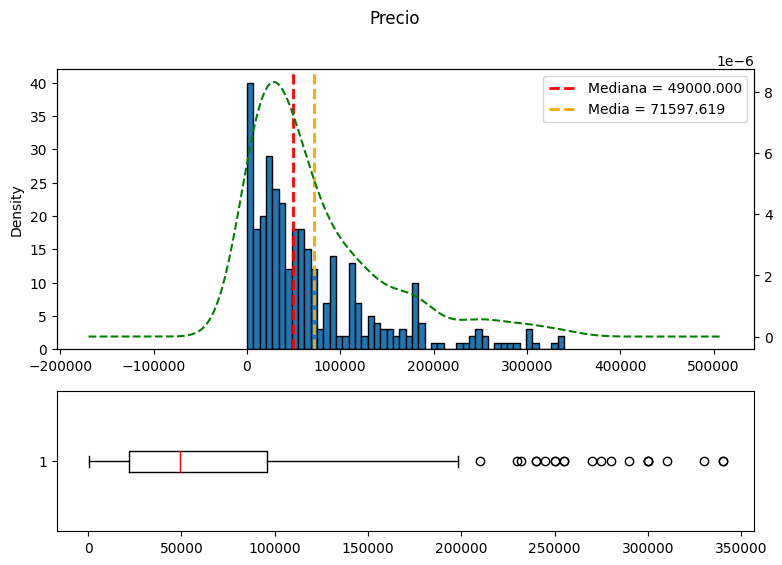

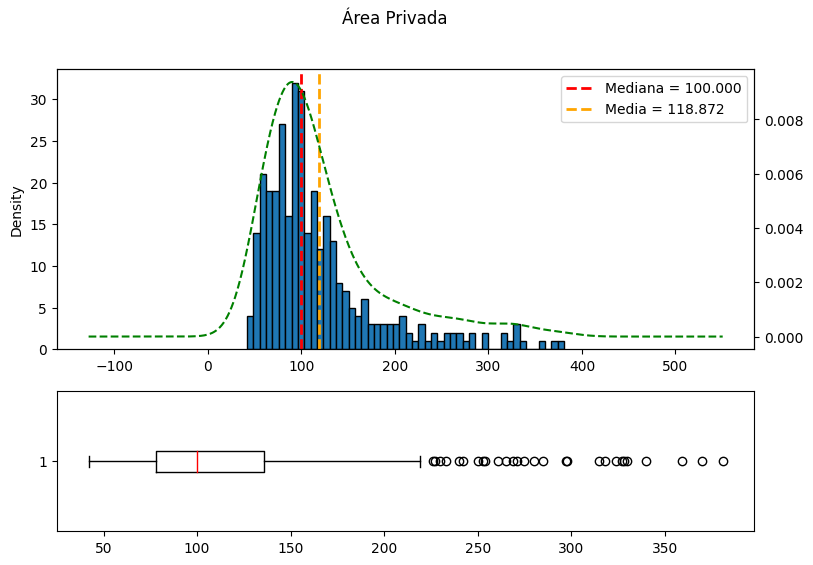

In [169]:
graph_numeric_without_outliers(apartments, ['Precio', 'Área Privada'])

Ahora sin los outliers, se puede ver que se repite el patrón de asimetría con cola hacia la derecha también para los departamentos.